In [1]:
import pandas as pd
import datetime
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
def datetime_merge(d, t):
    dt = str(d) + " " + str(t)
    return datetime.datetime.strptime(dt, '%Y%m%d %H%M%S')

def get_arrs(df):
    df['<TIME>'] = df['<TIME>'].apply('{:0=6}'.format)
    df['ds'] = df.apply(lambda row:datetime_merge(*row[['<DTYYYYMMDD>', '<TIME>']]), axis=1)
    df['y'] = df['<CLOSE>']
    return df[['ds', 'y']]

In [3]:
file_name = 'USDJPY.txt'
df_all = pd.read_csv(file_name)

df_all

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,USDJPY,20010102,230300,114.43,114.43,114.43,114.43,4
1,USDJPY,20010102,230400,114.44,114.44,114.44,114.44,4
2,USDJPY,20010102,230500,114.44,114.44,114.44,114.44,4
3,USDJPY,20010102,230700,114.44,114.44,114.44,114.44,4
4,USDJPY,20010102,230800,114.44,114.44,114.44,114.44,4
...,...,...,...,...,...,...,...,...
6736675,USDJPY,20200228,215500,108.06,108.07,108.05,108.05,4
6736676,USDJPY,20200228,215600,108.05,108.06,108.05,108.06,4
6736677,USDJPY,20200228,215700,108.06,108.08,108.06,108.08,4
6736678,USDJPY,20200228,215800,108.07,108.07,108.04,108.05,4


In [4]:
n = 100000
m = 10000

In [5]:
df_original_long = df_all[n:n+m].copy().reset_index(drop=True)
df_original_short = df_all[n:n+m].tail(1000).copy().reset_index(drop=True)

In [6]:
df_long = get_arrs(df_original_long)
df_short = get_arrs(df_original_short)

In [7]:
test_num = 60
df_train_long = df_long.iloc[:-test_num]
df_train_short = df_short.iloc[:-test_num]
df_test = df_short.iloc[-test_num:]

In [8]:
m_long = Prophet(seasonality_mode='multiplicative')
m_long.fit(df_train_long)

m_short = Prophet(seasonality_mode='multiplicative')
m_short.fit(df_train_short)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future_short = m_short.make_future_dataframe(periods=test_num, freq='T' )
future_long = m_long.make_future_dataframe(periods=test_num, freq='T' )

In [10]:
forecast_short = m_short.predict(future_short)
forecast_long = m_long.predict(future_long)

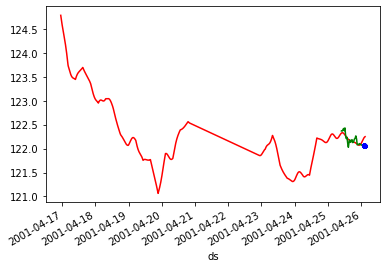

In [11]:
# fig_long = m_long.plot(forecast_long)
forecast_long.set_index('ds')['yhat'].plot(color='r')
forecast_short.set_index('ds')['yhat'].plot(color='g')
df_test.set_index('ds')['y'].plot(color='b', linestyle='', marker='.')

# max_dt = datetime.datetime.strptime('20200229', '%Y%m%d')
# min_dt = datetime.datetime.strptime('20200228', '%Y%m%d')
# plt.xlim(min_dt, max_dt)
plt.show()

/home/ryoji/.cache/pypoetry/virtualenvs/trade-Pm8PR6AO-py3.8/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


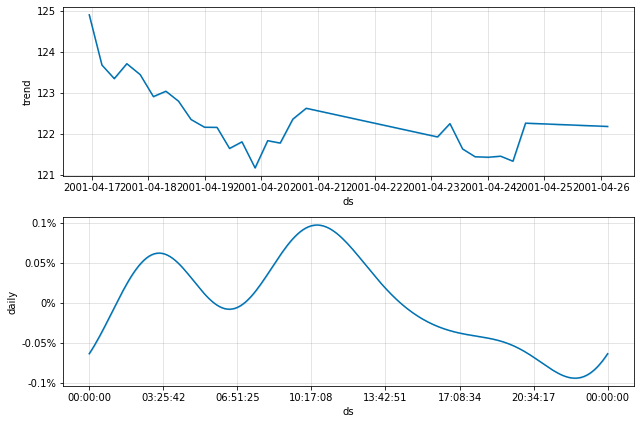

In [12]:
fig2 = m_long.plot_components(forecast_long)

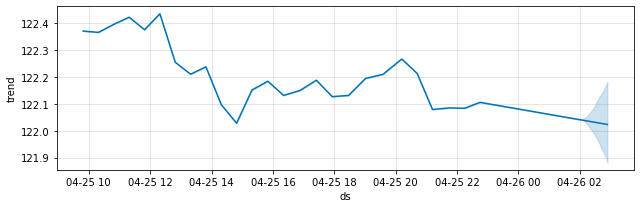

In [13]:
fig2 = m_short.plot_components(forecast_short)